In [103]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
dems = pd.read_csv('../datasets/dem_candidates.csv')
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [105]:
endorsement_cols = dems.columns[pd.Series(dems.columns).str.contains('Endorsed')].values
endorsement_cols = np.append(endorsement_cols, 'Guns Sense Candidate?')
endorsement_cols = np.append(endorsement_cols, 'No Labels Support?')
dems[endorsement_cols] = dems[endorsement_cols].replace({'No': 0, 'Yes': 1})
dems['Total Endorsements'] = dems[endorsement_cols].sum(axis=1)
dems['Endorsed'] = (dems['Total Endorsements'] > 0).astype(int)

In [106]:
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [107]:
endorsement_cols

array(['Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?',
       'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?',
       'Guns Sense Candidate?', 'No Labels Support?'], dtype=object)

# EDA

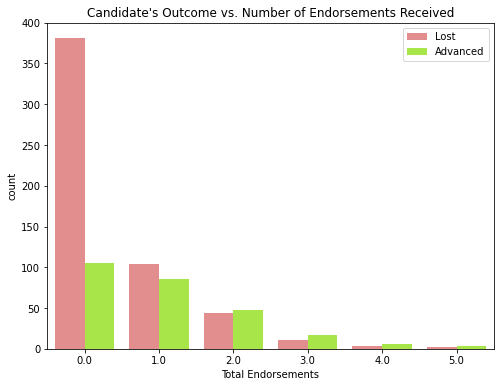

In [108]:
plt.figure(figsize=(8, 6))
colours = {'Lost': 'lightcoral', 'Advanced': 'greenyellow'}
sns.countplot(data=dems, x='Total Endorsements', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Number of Endorsements Received")
plt.legend(loc='upper right');

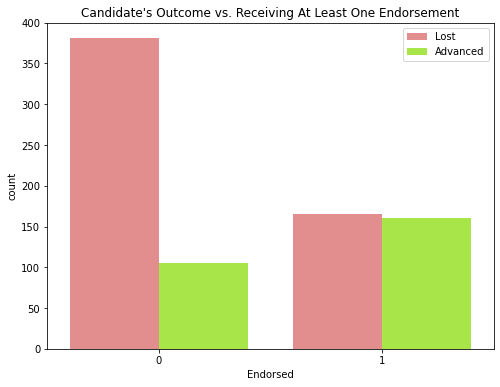

In [109]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Endorsed', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Receiving At Least One Endorsement")
plt.legend(loc='upper right');

KeyError: 0.0

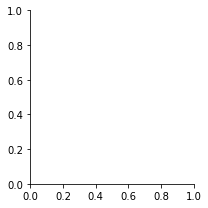

In [125]:
def countplot(x, hue, palette=colours, **kwargs):
    sns.countplot(x=x, hue=hue, palette=palette, **kwargs)

grid = sns.FacetGrid(data=dems, aspect=1)
fig = grid.map(countplot,'Biden Endorsed?', 'Sanders Endorsed?')
fig.add_legend()

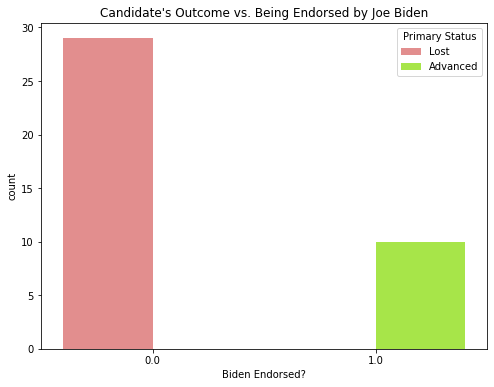

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Biden Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Joe Biden");

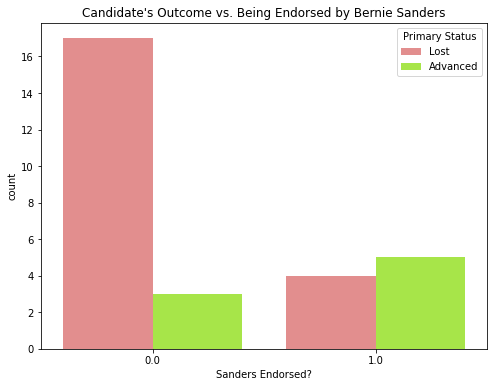

In [111]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Sanders Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Bernie Sanders");

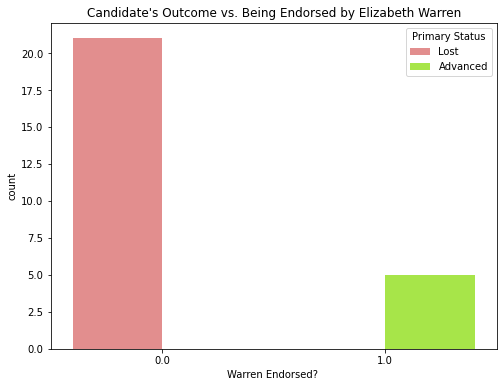

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Warren Endorsed? ', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Elizabeth Warren");

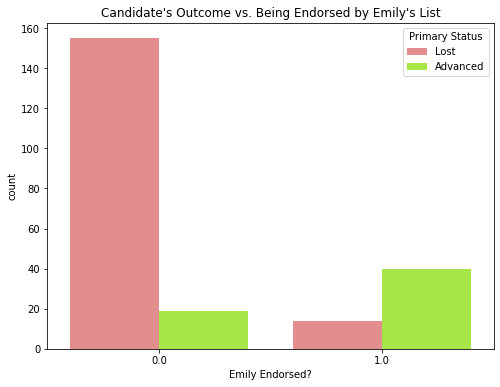

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Emily Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Emily's List");

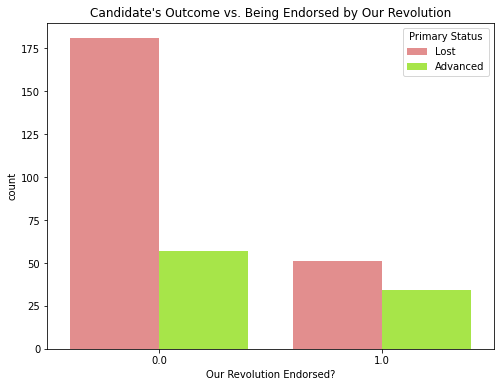

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Our Revolution Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Our Revolution");

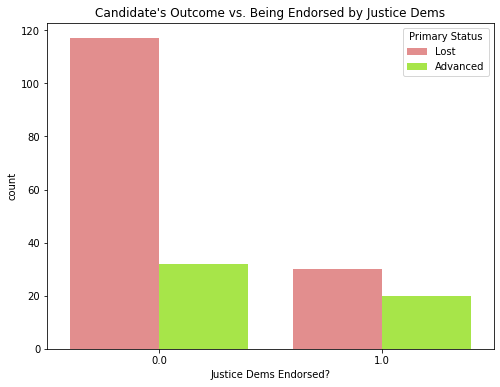

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Justice Dems Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Justice Dems");

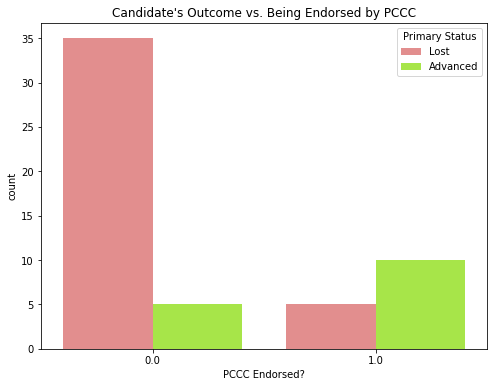

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='PCCC Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by PCCC");

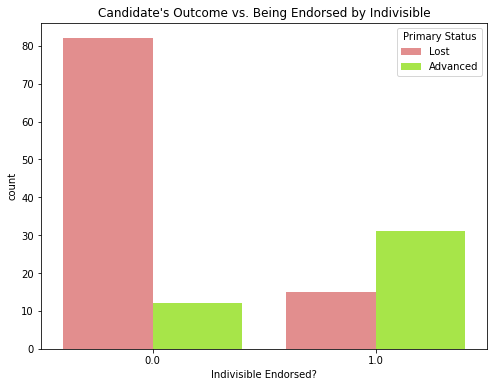

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Indivisible Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Indivisible");

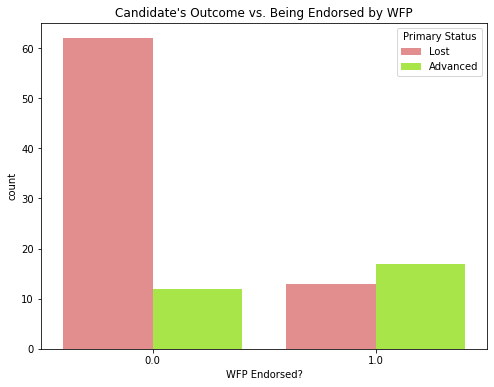

In [118]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='WFP Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by WFP");

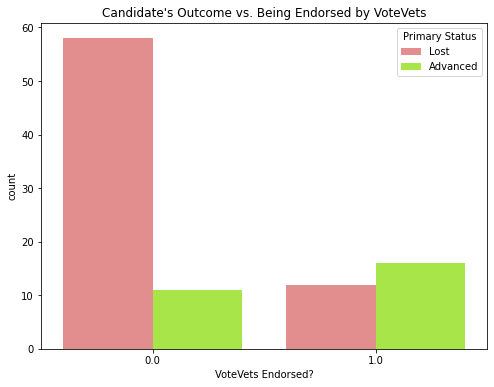

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='VoteVets Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by VoteVets");

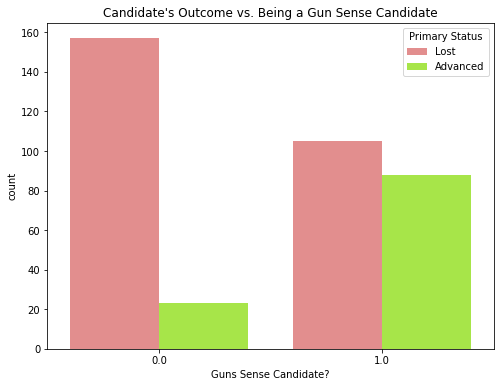

In [120]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Guns Sense Candidate?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being a Gun Sense Candidate");

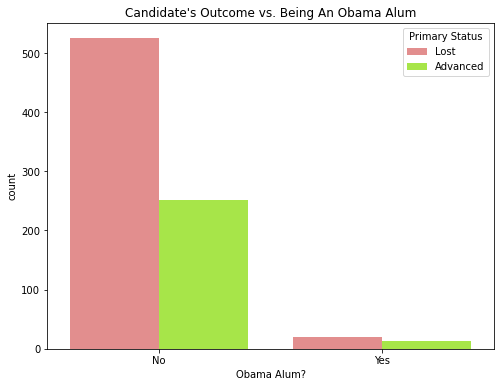

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Obama Alum?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being An Obama Alum");

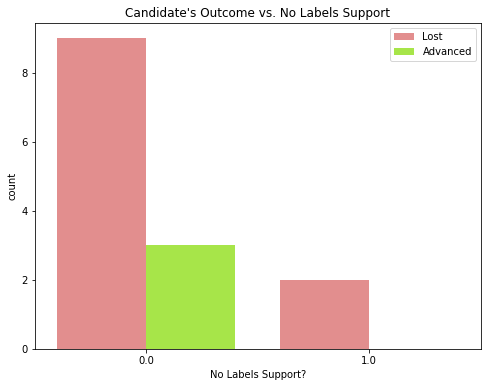

In [122]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='No Labels Support?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. No Labels Support")
plt.legend(loc='upper right');